# Exercice 3
## a) Euler methode
$\dfrac{d^2x}{dt^2}=-x$

$\dot x(0)=-1$ and $x(0)=1$

We transforme this equation on a system of frist order:\\
we note $v=\dfrac{dx}{dt}$. Thus we get
\begin{cases}
\dfrac{dv}{dt}=-x\\
\dfrac{dx}{dt}=u
\end{cases}
With $\dot v(0)=-1$ and $x(0)=1$

The exact solution is $x(t)=\cos t -\sin t$.

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Euler code
import numpy as np
import matplotlib.pyplot as plt
def EulerMethod(a,b,delta_t=0.01):
    N=int((b-a)/delta_t)
    t=np.linspace(a,b,N+1)
    v=np.zeros(N+1)
    x=np.zeros(N+1)
    v[0]=-1
    x[0]=1
    for i in range(N):
        v[i+1]=v[i]-delta_t*x[i]
        x[i+1]=x[i]+delta_t*v[i]
        
    return t, x,v

#Exact solution
f=lambda t: np.cos(t)-np.sin(t)


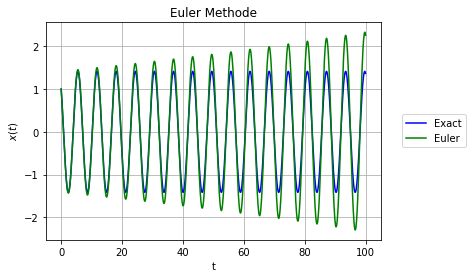

In [57]:
t,x1,v1=EulerMethod(0,100)

plt.plot(t,f(t),"b",label="Exact")
plt.plot(t,x1,"g",label="Euler")
plt.grid()
plt.xlabel("t")
plt.ylabel("$x(t)$")
plt.title("Euler Methode")
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

## b) Leapfrog methode general
$\dfrac{d^2x}{dt^2}=A(x,\dfrac{dx}{dt})$

In [4]:
#lEAPFROG general code
import numpy as np
import matplotlib.pyplot as plt

def LeapfrogMethod(a,b,A,delta_t=0.01):
    N=int((b-a)/delta_t)
    t=np.linspace(a,b,N+1)
    v=np.zeros(N+1)
    x=np.zeros(N+1)
    v[0]=-1
    x[0]=1
    for i in range(N):
        x[i+1]=x[i]+delta_t*v[i] +(1/2)*A(x[i],v[i])*delta_t**2
        v[i+1]=v[i]+(1/2)*(A(x[i],v[i])+A(x[i+1],v[i+1]))*delta_t  
    return t, x,v

### $\dfrac{d^2x}{dt^2}=-x=A_1(x)$

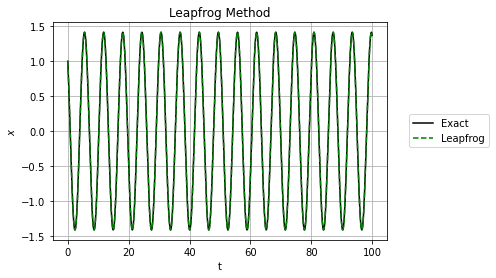

In [58]:
A1=lambda x,y: -x

t,x2,v2=LeapfrogMethod(0,100,A1)

plt.plot(t,f(t),"k",label="Exact")
plt.plot(t,x2,"g--",label="Leapfrog")
plt.grid()
plt.xlabel("t")
plt.ylabel("$x$")
plt.title("Leapfrog Method")
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

## C) Leapfrog methode
$\dfrac{d^2x}{dt^2}=-\sin x=A_2(x)$

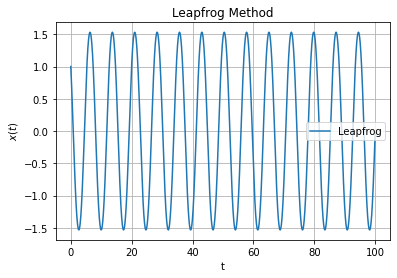

In [39]:
#RESOLUTION (t,x)
A2=lambda x,y: -np.sin(x)

t,x3,v3=LeapfrogMethod(0,100,A2)

plt.plot(t,x3,"",label="Leapfrog")
plt.grid()
plt.xlabel("t")
plt.ylabel("$x(t)$")
plt.title("Leapfrog Method")
plt.legend(loc="best")

plt.show()

### PLot $(x,\dot x)$

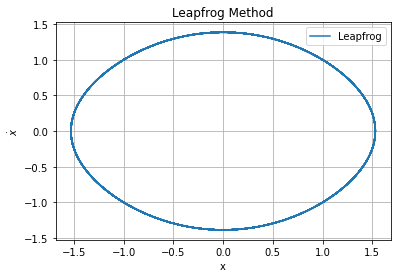

In [7]:

plt.plot(x3,v3,"",label="Leapfrog")
plt.grid()
plt.xlabel("x")
plt.ylabel("$\dotx$")
plt.title("Leapfrog Method")
plt.legend(loc="best")
plt.show()

### Phase plane

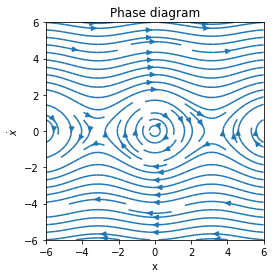

In [8]:
#PHASE DIAGRAM
X, V  = np.meshgrid(np.linspace(-6.0, 6.0, 30), np.linspace(-6.0, 6.0, 30))


dxdt = V
dvdt = -np.sin(X)

plt.streamplot(X, V, dxdt, dvdt)
plt.axis('square')#cube
plt.axis([-6, 6, -6, 6])
plt.title("Phase diagram")
plt.xlabel("x")
plt.ylabel("$\dotx$")
plt.show()


## Comparison
For the case $\dfrac{d^2x}{dt^2}=-\sin x$ the maximun amplitude of the phase is approximatively $1.5$ but for the case of  $\dfrac{d^2x}{dt^2}=-x$ this amplitude ils less than $1.5$

# d) $\dfrac{d^2x}{dt^2}=-x-\beta \dfrac{dx}{dt}=A_2(x,\dot x)$

### RESOLUTION $(t,x)$ with different $\beta$

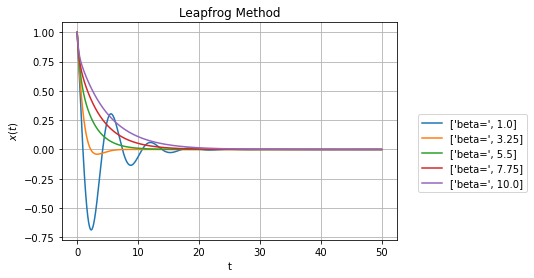

In [55]:
L=np.linspace(1,10,5)
for beta in L:
    A2=lambda x,dx: -x-beta*dx

    t,x4,v4=LeapfrogMethod(0,50,A2)

    plt.plot(t,x4,label=["beta=",beta])
    plt.grid()
    plt.xlabel("t")
    plt.ylabel("$x(t)$")
    plt.title("Leapfrog Method")
    plt.legend(bbox_to_anchor = (1.05, 0.6))


plt.show()

### RESOLUTION $(x,\dot x)$ with different $\beta$ :Phase diagram

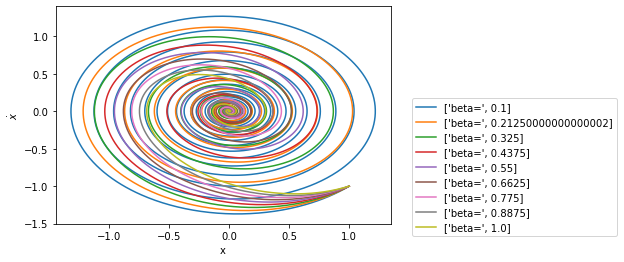

In [54]:
L=np.linspace(0.1,1,9)
for beta in L:
    A2=lambda x,dx: -x-beta*dx

    t,x4,v4=LeapfrogMethod(0,100,A2)
    plt.plot(x4,v4,"",label=["beta=",beta])
plt.xlabel("x")
plt.ylabel("$\dotx$")
plt.legend(bbox_to_anchor = (1.05, 0.6))

### Phase diagram $\beta=0.5$

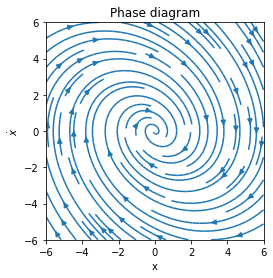

In [46]:
beta=0.5
X, V  = np.meshgrid(np.linspace(-6.0, 6.0, 30), np.linspace(-6.0, 6.0, 30))


dxdt = V
dvdt = -X-beta*V

plt.streamplot(X, V, dxdt, dvdt)
plt.axis('square')#cube
plt.axis([-6, 6, -6, 6])
plt.title("Phase diagram")
plt.xlabel("x")
plt.ylabel("$\dotx$")
plt.show()

## e) We replace $-\beta \dot x$ by $-\beta \sin (\dot x)$

$\dfrac{d^2x}{dt^2}=-x-\beta \sin (\dot x)=A_3(x,\dot(x))$

Resolution for different values of $\beta$

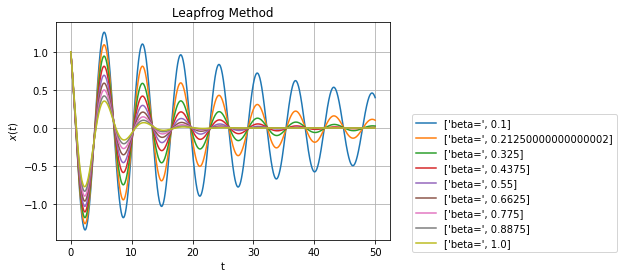

In [53]:
L=np.linspace(0.1,1,9)
for beta in L:
    A3=lambda x,dx: -x-beta*np.sin(dx) 
    t,x4,v4=LeapfrogMethod(0,50,A3)

    plt.plot(t,x4,label=["beta=",beta])
    plt.grid()
    plt.xlabel("t")
    plt.ylabel("$x(t)$")
    plt.title("Leapfrog Method")
    plt.legend(bbox_to_anchor = (1.05, 0.6))

plt.show()

### RESOLUTION $(x,\dot x)$ with different $\beta$ :Phase diagram

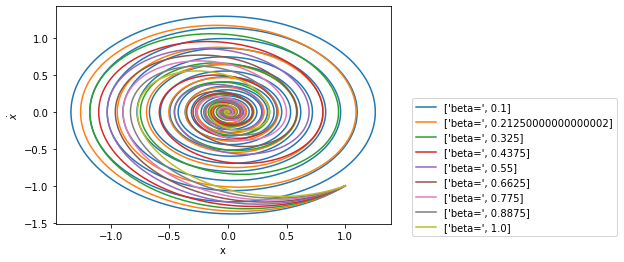

In [56]:
L=np.linspace(0.1,1,9)
for beta in L:
    A3=lambda x,dx: -x-beta*np.sin(dx)
    t,x5,v5=LeapfrogMethod(0,100,A3)
    plt.plot(x5,v5,"",label=["beta=",beta])
plt.xlabel("x")
plt.ylabel("$\dotx$")
plt.legend(bbox_to_anchor = (1.05, 0.6))


 ### Phase diagram $\beta=0.5$

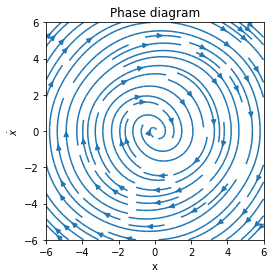

In [51]:
beta=0.5
X, V  = np.meshgrid(np.linspace(-6.0, 6.0, 30), np.linspace(-6.0, 6.0, 30))


dxdt = V
dvdt = -X-beta*np.sin(V)

plt.streamplot(X, V, dxdt, dvdt)
plt.axis('square')#cube
plt.axis([-6, 6, -6, 6])
plt.title("Phase diagram")
plt.xlabel("x")
plt.ylabel("$\dotx$")
plt.show()

## Comparison
For the case $\dfrac{d^2x}{dt^2}=-x-\beta\sin( \dot x)$ we have more oscillation thant the case $\dfrac{d^2x}{dt^2}=-x-\beta\dot x$.